<a href="https://colab.research.google.com/github/GabrielaRomoM/DIP-2024-2/blob/main/Talleres/Taller1_PDI-2024-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libreria

In [ ]:
#Library
import matplotlib.image as mpimg
import matplotlib.pylab as plt, pylab
from skimage import io, color, filters, morphology
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, skeletonize, rectangle, remove_small_objects
from skimage.io import imread
from skimage import img_as_float
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Cargar Datos

In [ ]:
def load_data(FILEID):
    #FILEID es la identificación de un archivo .zip en mi drive con permisos para cualquiera que posea el ID
    ## dicho ID se encuentra en celdas más abajo.
    #Se carga, descomprime y finalmente guarda en la variable Data el conjunto de datos.
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O parches.zip && rm -rf /tmp/cookies.txt
    !unzip parches.zip
    !dir

    #Data=df.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
load_data('1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY')

--2024-11-24 02:23:24--  https://docs.google.com/uc?export=download&confirm=&id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY
Resolving docs.google.com (docs.google.com)... 172.253.122.100, 172.253.122.139, 172.253.122.113, ...
Connecting to docs.google.com (docs.google.com)|172.253.122.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download [following]
--2024-11-24 02:23:24--  https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18197214 (17M) [application/octet-stream]
Saving to: ‘parches.zip’

parches.zip         100%[===================>]  17.35M  -

# Taller

## Ejercicio 1
Crea un algoritmo que identifique y separe cada uno de los objetos presentes en la siguiente imagen, objeto en color blanco y fonde de color negro

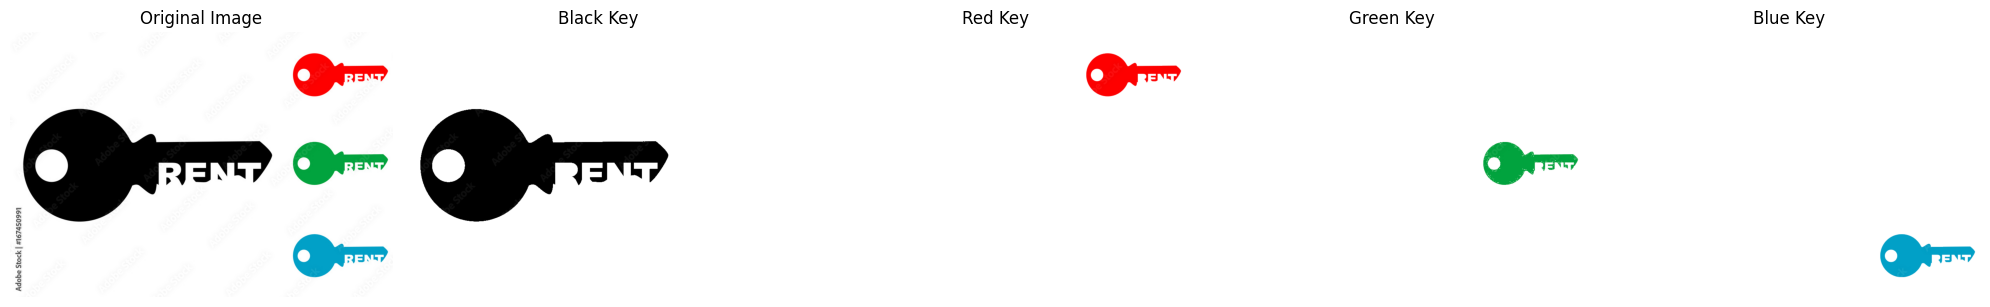

In [ ]:
# Cargar Imagen
path='/content/images/'
image = mpimg.imread(path + 'llaves.jpg')
# Convertir Imagen (RGB a HSV)
image_hsv_skimage = color.rgb2hsv(image)

# Definir rangos en HSV y crear mascaras
def create_hsv_mask(image_hsv, lower_bound, upper_bound):
    mask = np.all((image_hsv >= lower_bound) & (image_hsv <= upper_bound), axis=-1)
    return mask

# Umbrales en HSV para diferenciar las llaves
black_lower = np.array([0.0, 0.0, 0.0])
black_upper = np.array([1.0, 1.0, 0.2])
red_lower1 = np.array([0.0, 0.2, 0.2])
red_upper1 = np.array([0.05, 1.0, 1.0])
red_lower2 = np.array([0.95, 0.2, 0.2])
red_upper2 = np.array([1.0, 1.0, 1.0])
green_lower = np.array([0.2, 0.2, 0.2])
green_upper = np.array([0.4, 1.0, 1.0])
blue_lower = np.array([0.5, 0.2, 0.2])
blue_upper = np.array([0.75, 1.0, 1.0])

#Crear mascaras para cada color
maskbk = create_hsv_mask(image_hsv_skimage, black_lower, black_upper)
maskr = create_hsv_mask(image_hsv_skimage, red_lower1, red_upper1) | create_hsv_mask(image_hsv_skimage, red_lower2, red_upper2)
maskg = create_hsv_mask(image_hsv_skimage, green_lower, green_upper)
maskbl = create_hsv_mask(image_hsv_skimage, blue_lower, blue_upper)

# Remove small objects (ruido)
maskbk = remove_small_objects(maskbk, min_size=500)
maskr = remove_small_objects(maskr, min_size=500)
maskg = remove_small_objects(maskg, min_size=500)
maskbl = remove_small_objects(maskbl, min_size=500)

# Extraer cada llave usando las máscaras
keyblack = image.copy() ; keyblack[~maskbk] = 0
keyred = image.copy() ; keyred[~maskr] = 0
keygreen = image.copy() ; keygreen[~maskg] = 0
keyblue = image.copy() ; keyblue[~maskbl] = 0

# Cambiar fondo (Blanco)
bg_keyblack = keyblack.copy() ; bg_keyblack[~maskbk] = [255,255,255]
bg_keyred = keyred.copy() ; bg_keyred[~maskr] = [255, 255, 255]
bg_keygreen = keygreen.copy() ; bg_keygreen[~maskg] = [255, 255, 255]
bg_keyblue = keyblue.copy() ; bg_keyblue[~maskbl] = [255, 255, 255]

# Mostrar imagenes
plt.figure(figsize=(20,10))
plt.subplot(151), plt.imshow(image), plt.title('Original Image'), plt.axis('off')
plt.subplot(152), plt.imshow(bg_keyblack), plt.title('Black Key'), plt.axis('off')
plt.subplot(153), plt.imshow(bg_keyred), plt.title('Red Key'), plt.axis('off')
plt.subplot(154), plt.imshow(bg_keygreen), plt.title('Green Key'), plt.axis('off')
plt.subplot(155), plt.imshow(bg_keyblue), plt.title('Blue Key'), plt.axis('off')
plt.tight_layout()
plt.show()

## Ejercicio 2

Diseña una clase que acepte una imagen en formato RGB y aplique manualmente las siguientes transformaciones:

*   Conversión de RGB a HSV
*   Conversión de RGB a CMYK



Para ambas conversiones (HSV y CMYK) Si los valores de RGb estan de 0 a 255 normalizar para obtener valores en el rango de 0 a 1.


**Conversión Manual de RGB a HSV**

- Determinar el valor máximo, minimo y la diferencia entre ellos:

$$C_{max} = \max(R_{norm}, G_{norm}, B_{norm})$$
$$C_{min} = \min(R_{norm}, G_{norm}, B_{norm})
$$
$$\Delta = C_{max} - C_{min}$$

- Calcular el tono (Hue,H):
Se calcula en grados (0 a 360):
$$H = \begin{cases} 0 & \text{si } \Delta = 0 \\60^\circ \times \left( \frac{G_{norm} - B_{norm}}{\Delta} \mod 6 \right) & \text{si } C_{max} = R_{norm} \\
60^\circ \times \left( \frac{B_{norm} - R_{norm}}{\Delta} + 2 \right) & \text{si } C_{max} = G_{norm} \\60^\circ \times \left( \frac{R_{norm} - G_{norm}} {\Delta} + 4 \right) & \text{si } C_{max} = B_{norm}\end{cases}$$

    Si H es negativo, se debe sumar 360 para llevarlo al rango de 0 a 360.



- Calcular la saturación (Saturation, S):

$$S = \begin{cases} 0 & \text{si } C_{max} = 0 \\\frac{\Delta}{C_{max}} & \text{si } C_{max} \neq 0\end{cases}$$

- Calcular el brillo (Value, V):

$$V = C_{max}$$


Para una imagen completa, se repite el proceso para cada píxel.


**Conversión manual RGB a CMYK**

- Cálculo de K(Negro):
$${K} = 1 - \max(R, G, B)$$

- Cálculo de C(Cian):
$${C} = \frac{1 - R - \text{K}}{1 - \text{K}} \quad \text{si} \quad \text{K} < 1$$

- Cálculo de M(Magenta):
$${M} = \frac{1 - G - \text{K}}{1 - \text{K}} \quad \text{si} \quad \text{K} < 1$$

- Cálculo de Y(Amarillo):
$${Y} = \frac{1 - B - \text{K}}{1 - \text{K}} \quad \text{si} \quad \text{K} < 1$$

- Escala a porcentaje:
$$\quad C = C \times 100, \quad M = M \times 100, \quad Y = Y \times 100, \quad K = K \times 100$$


### Definición de Clase Manual

In [ ]:
class convcolor:
  def __init__(self, img):
    self.imagen = img/255 # Normalizar a [0,1]

  def converhsv(self):
    #Descomposición de los tres canales de color RGB
    r, g, b = self.imagen[:,:,0], self.imagen[:,:,1], self.imagen[:,:,2]
    #Determinar el valor máximo y minimo entre los componentes de la imagen
    max_rgb = np.max(self.imagen, axis=2)
    min_rgb = np.min(self.imagen, axis=2)
    delta = max_rgb - min_rgb

    #Condiciones (Mascaras para identificar los pixeles sin uso de ciclos)
    mask_r = (max_rgb == r)
    mask_g = (max_rgb == g)
    mask_b = (max_rgb == b)
    d0 = (delta>0) #Evitar divisiones por cero

    #Calcular tono (Hue,H)
    h = np.zeros_like(max_rgb)  # Inicializar matriz de Hue
    h[mask_r & d0] = 60 * ((g[mask_r & d0] - b[mask_r & d0]) / delta[mask_r & d0])
    h[mask_g & d0] = 60 * ((b[mask_g & d0] - r[mask_g & d0]) / delta[mask_g & d0] + 2)
    h[mask_b & d0] = 60 * ((r[mask_b & d0] - g[mask_b & d0]) / delta[mask_b & d0] + 4)
    h = h % 360 #Ajusta valores negativos de H

    #Calcular saturación (Saturation, S)
    s = np.zeros_like(max_rgb)
    s[max_rgb == 0] = 0
    s[max_rgb > 0] = delta[max_rgb > 0] / max_rgb[max_rgb > 0]

    #Calcular valor (Value, V)
    v = max_rgb

    #Unión de todos los canales
    hsv = np.stack((h, s, v), axis=2)
    hsvimg = np.clip(hsv, 0, 1)

    plt.figure(figsize=(12, 8))
    plt.subplot(131), plt.imshow(self.imagen), plt.title('Original Image'), plt.axis('off')
    plt.subplot(132), plt.imshow(hsvimg), plt.title('HSV Image'), plt.axis('off')

  def convercmyk(self):
    #Calcular K (Negro)
    k = 1 - np.max(self.imagen, axis=2)
    kmask = (k>0) #Evitar divisiones por cero

    # Asignar directamente 0 a C, M, Y para los píxeles donde k >= 1
    c = (1 - self.imagen[:,:,0] - k)
    m = (1 - self.imagen[:,:,1] - k)
    y = (1 - self.imagen[:,:,2] - k)

    nkmask = ~kmask  # Invertir la máscara para los píxeles no negros
    c[nkmask] = c[nkmask] / (1 - k[nkmask])
    m[nkmask] = m[nkmask] / (1 - k[nkmask])
    y[nkmask] = y[nkmask] / (1 - k[nkmask])

    #Convertir de escala 0-100
    c = c*100
    m = m*100
    y = y*100
    k = k*100

    #Union de todos los canales
    cmyk = np.stack((c, m, y, k), axis=2)
    cmykimg = np.clip(cmyk, 0, 1)

    plt.subplot(133), plt.imshow(cmykimg), plt.title('CMYK Image'), plt.axis('off')
    plt.show()

def showconv(image):
  path='/content/images/'
  image = mpimg.imread(path + img)
  new = convcolor(image)
  new.converhsv(),new.convercmyk()

### Impresión imagenes (RGB,HSV,CYMK)

rhino.jpg


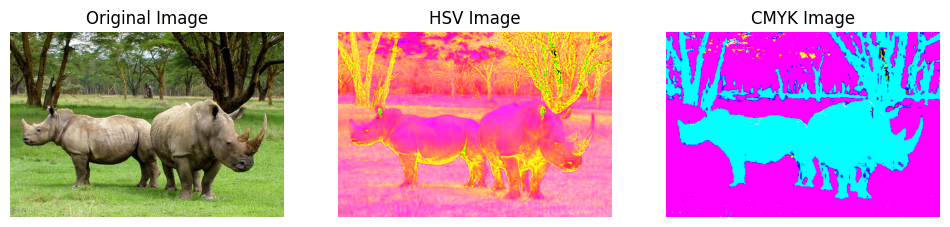

In [ ]:
img = input("Ingrese la imagen a convertir con su extensión (.jpg,.png,etc):\r")
showconv(img)

## Ejercicio 3

Desarrolla una clase que acepte una imagen y realice las siguientes transformaciones de forma manual:

- Escalado de Imagen.
- Cambio de tamaño de Imagen.

### Definición de clase manual

In [ ]:
class imgtransform:
  def __init__(self, img):
    self.imagen = img

  def scaleimg(self,factor):
    #Utilizando interpolacion
    height, width, channels = self.imagen.shape
    newheight = int(height * factor)
    newwidth = int(width * factor)
    #Crear nueva imagen
    new_img = np.zeros((newheight, newwidth, channels), dtype=np.uint8)
    #Recorrer la imagen
    for i in range(newheight):
      for j in range(newwidth):
        #Obtener las coordenadas originales en la imagen original
        x = int(i * height / newheight)
        y = int(j * width / newwidth)
        new_img[i, j] = self.imagen[x, y]
    plt.figure(figsize=(15, 10))
    plt.subplot(121)
    plt.imshow(self.imagen)
    plt.title(f'Original Image {width}x{height}')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(new_img)
    plt.title(f'Scaled Image {factor}=({newwidth}x{newheight})')
    plt.axis('off')
    plt.show()

  def resizeimg(self,new_height,new_width):
    #Utilizando interpolación
    height, width, channels = self.imagen.shape
    #Crear nueva imagen
    new_imgr = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    #Recorrer la imagen
    for k in range(new_height):
      for l in range(new_width):
        #Obtener las coordenadas originales en la imagen
        x = int(k * height / new_height)
        y = int(l * width / new_width)
        new_imgr[k, l] = self.imagen[x, y]
    plt.figure(figsize=(12, 8))
    plt.imshow(new_imgr)
    plt.title(f'Resized Image ({new_width}x{new_height})')
    plt.axis('off')
    plt.show()

def showtrans(image):
  path='/content/images/'
  image = mpimg.imread(path + img2)
  new = imgtransform(image)
  new.scaleimg(sc)
  new.resizeimg(himg,wimg)

### Impresión de Imagenes (Original, Escala, Tamaño)

zebras.jpg
0.2
100
400


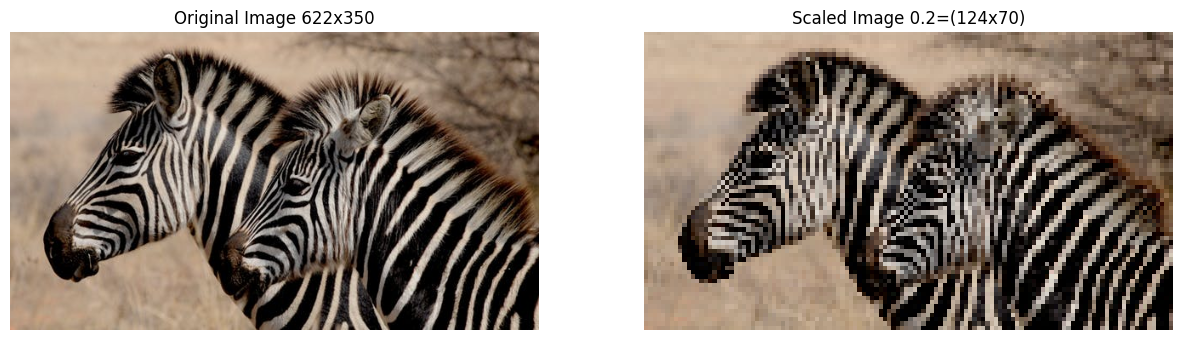

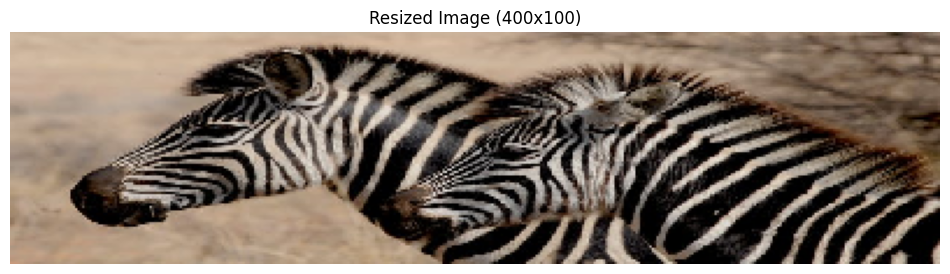

In [ ]:
img2 = input("Ingrese la imagen a transformar con su extensión (.jpg,.png,etc):\r")
sc = float(input("Ingrese el factor de escalado:\r"))
himg = int(input("Ingrese el tamaño de la imagen (Alto):\r"))
wimg = int(input("Ingrese el tamaño de la imagen (Ancho):\r"))
showtrans(img2)

## Ejercicio 4

Reproduce los procesos enseñados en clase utilizando la biblioteca Opencv. Aplica las mismas transformaciones usando las funciones proporcionadas por la librería.)

### Erosion

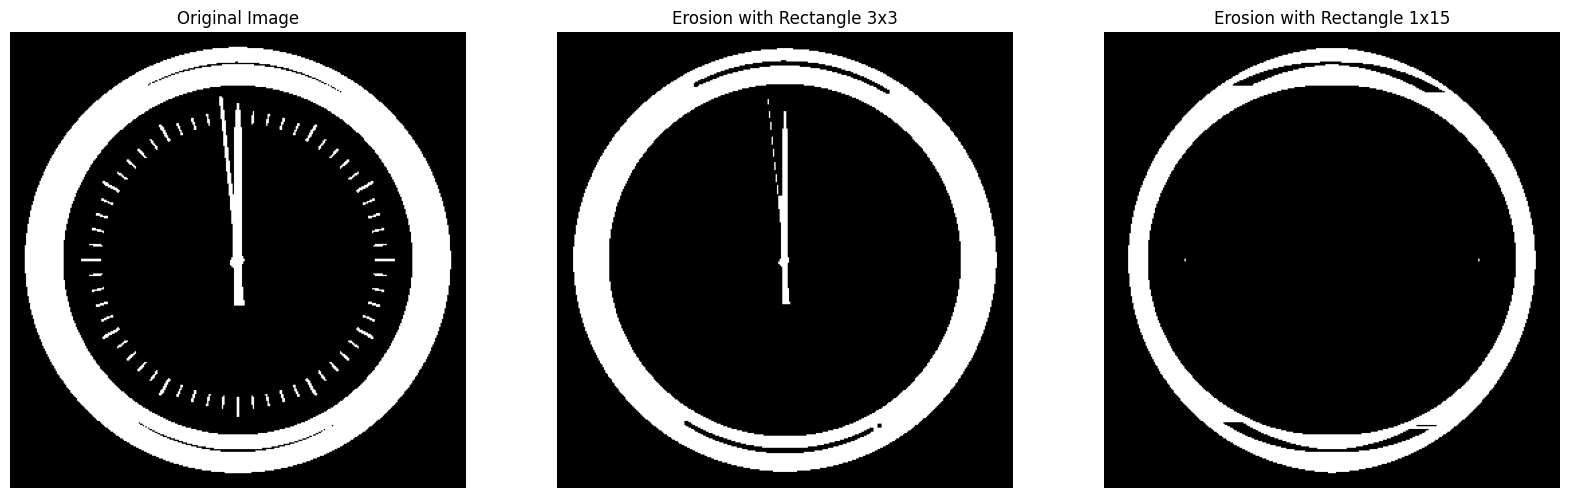

In [ ]:
path = '/content/images/'

# Cargar la imagen y convertirla a escala de grises
im = cv2.imread(path + 'clock2.jpg', cv2.IMREAD_COLOR)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Convertir a imagen binaria utilizando un umbral de 0.5 (128 en escala de grises)
_, binary_im = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1), plt.imshow(binary_im, cmap='gray'), plt.title('Original Image'), plt.axis('off')
# Erosión con un rectángulo de tamaño (3, 3)
kernel = np.ones((3, 3), np.uint8)
erosion1 = cv2.erode(binary_im, kernel, iterations=1)
plt.subplot(1, 3, 2), plt.imshow(erosion1, cmap='gray'), plt.title('Erosion with Rectangle 3x3'), plt.axis('off')
# Erosión con un rectángulo de tamaño (1, 15)
kernel2 = np.ones((1, 15), np.uint8)
erosion2 = cv2.erode(binary_im, kernel2, iterations=1)
plt.subplot(1, 3, 3), plt.imshow(erosion2, cmap='gray'), plt.title('Erosion with Rectangle 1x15'), plt.axis('off')
plt.show()

### Dilation

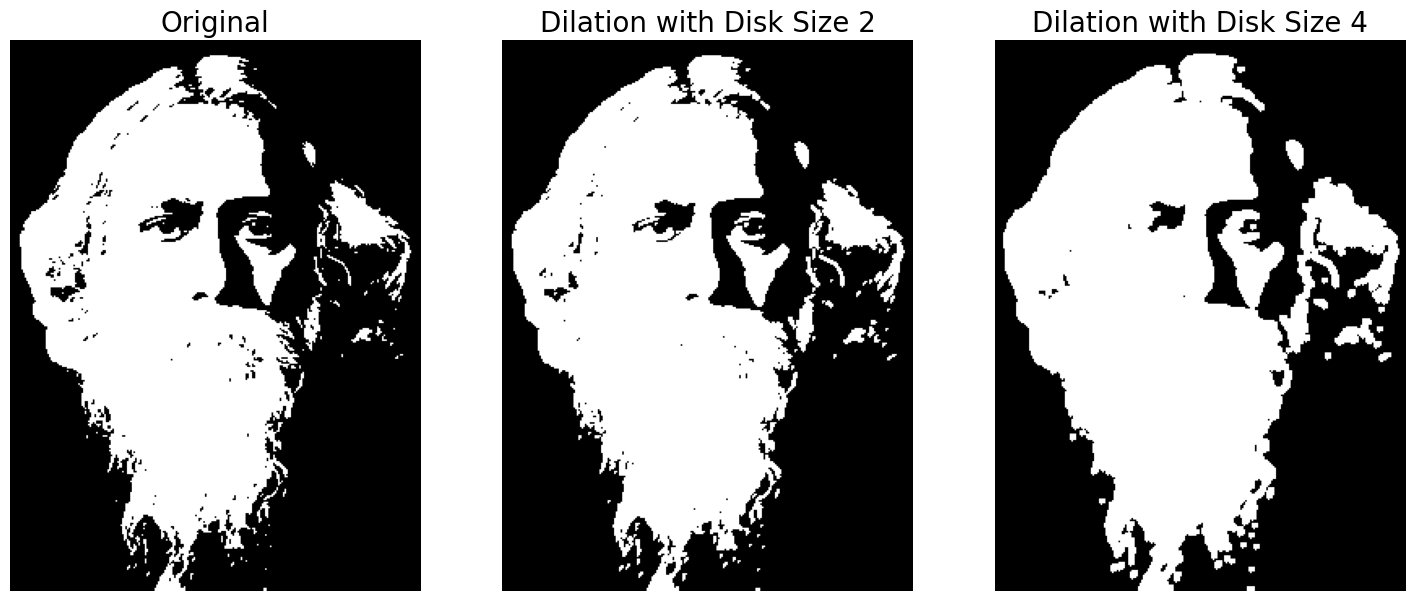

In [ ]:
# Cargar la imagen con transparencia (canal alfa)
im = cv2.imread(path + 'tagore.png', cv2.IMREAD_UNCHANGED)

# Normalizar la imagen
im = im.astype(np.float32) / im.max()
# Extraer el canal alfa (transparencia) y realizar la inversión
im = 1.0 - im[..., 3]
# Binarizar la imagen
im[im <= 0.5] = 0
im[im > 0.5] = 1

plt.figure(figsize=(18, 9))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original', size=20), plt.axis('off')
# Dilatación con un disco de tamaño 2
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*1, 2*1))
im1 = cv2.dilate(im.astype(np.uint8), kernel, iterations=1)
plt.subplot(132), plt.imshow(im1, cmap='gray'), plt.title('Dilation with Disk Size 2', size=20), plt.axis('off')
# Dilatación con un disco de tamaño 4
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*2, 2*2))
im2 = cv2.dilate(im.astype(np.uint8), kernel2, iterations=1)
plt.subplot(133), plt.imshow(im2, cmap='gray'), plt.title('Dilation with Disk Size 4', size=20), plt.axis('off')
plt.show()


### Opening and Closing

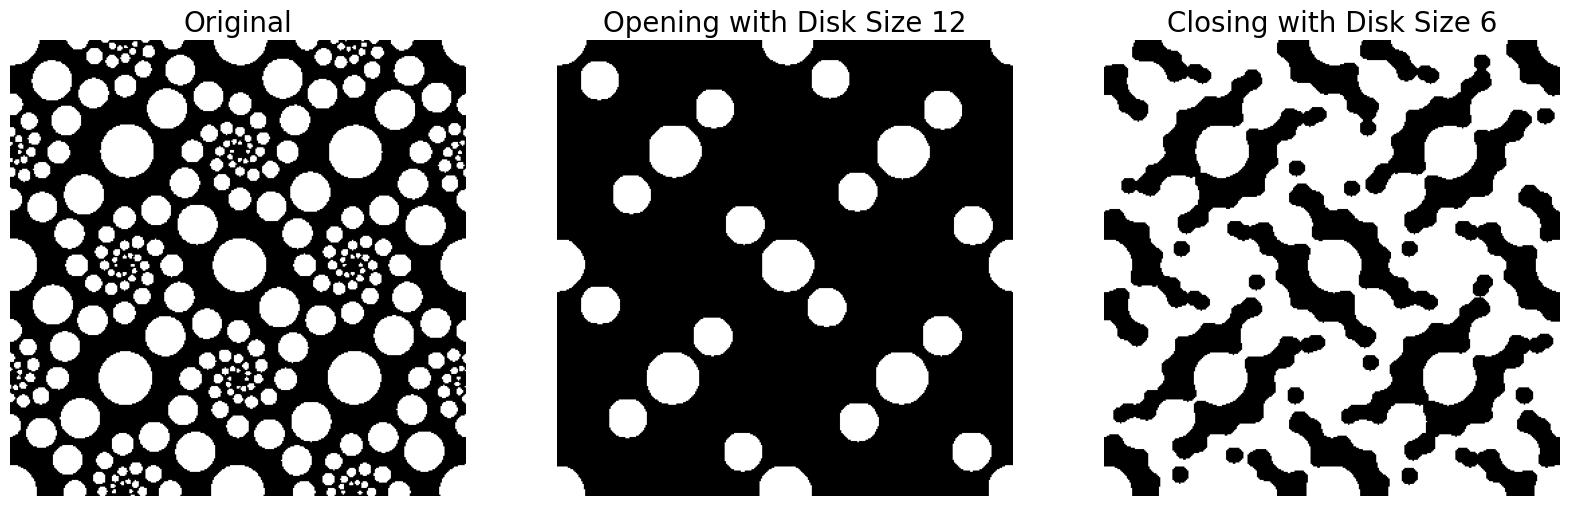

In [ ]:
# Cargar la imagen y convertir a escala de grises
im = cv2.imread(path + 'circles.jpg', cv2.IMREAD_COLOR)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Binarizar la imagen
_, im_binary = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY)

# Mostrar la imagen original
plt.figure(figsize=(20, 10)), plt.subplot(1, 3, 1), plt.imshow(im_binary, cmap='gray'), plt.title('Original', size=20), plt.axis('off')

# Crear un kernel de disco de tamaño 12
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (24, 24))
# Operación de apertura (opening) con el disco de tamaño 12
im_opening = cv2.morphologyEx(im_binary, cv2.MORPH_OPEN, kernel)
plt.subplot(1, 3, 2), plt.imshow(im_opening, cmap='gray'), plt.title('Opening with Disk Size 12', size=20), plt.axis('off')

# Crear un kernel de disco de tamaño 6
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 12))
# Operación de cierre (closing) con el disco de tamaño 6
im_closing = cv2.morphologyEx(im_binary, cv2.MORPH_CLOSE, kernel2)
plt.subplot(1, 3, 3), plt.imshow(im_closing, cmap='gray'), plt.title('Closing with Disk Size 6', size=20), plt.axis('off')
plt.show()

### Computing the convex hull

<Figure size 640x480 with 0 Axes>

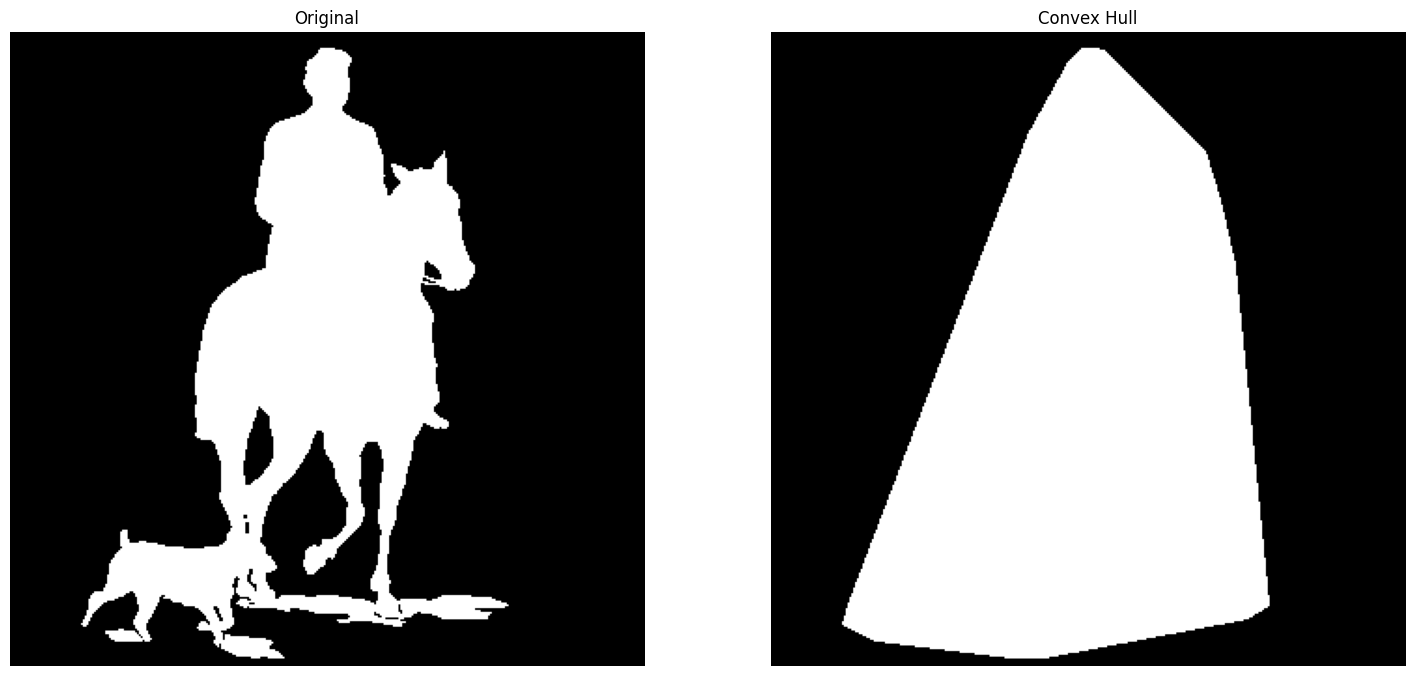

In [ ]:
# Función para mostrar las imágenes lado a lado
def plot_images_horizontally(original, filtered, filter_name, sz=(18, 7)):
    plt.gray()
    plt.figure(figsize=sz)
    plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Original'), plt.axis('off')
    plt.subplot(122), plt.imshow(filtered, cmap='gray'), plt.title(filter_name), plt.axis('off')
    plt.show()

# Cargar la imagen y convertirla a escala de grises
im = cv2.imread(path + 'horse-dog.jpg', cv2.IMREAD_GRAYSCALE)

# Umbralizar la imagen para obtener una imagen binaria
threshold = 0.5 * 255  # Umbralizamos usando 0.5 de 255
_, im_binary = cv2.threshold(im, threshold, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen binaria
contours, _ = cv2.findContours(im_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una imagen en negro para dibujar el contorno convexo
chull = np.zeros_like(im_binary)

# Dibujar el contorno convexo en la imagen
for contour in contours:
    # Obtener el contorno convexo de cada contorno
    hull = cv2.convexHull(contour)
    cv2.drawContours(chull, [hull], -1, 255, thickness=cv2.FILLED)

# Mostrar la imagen original y el contorno convexo
plot_images_horizontally(im_binary, chull, 'Convex Hull', sz=(18, 9))

### Removing small objects

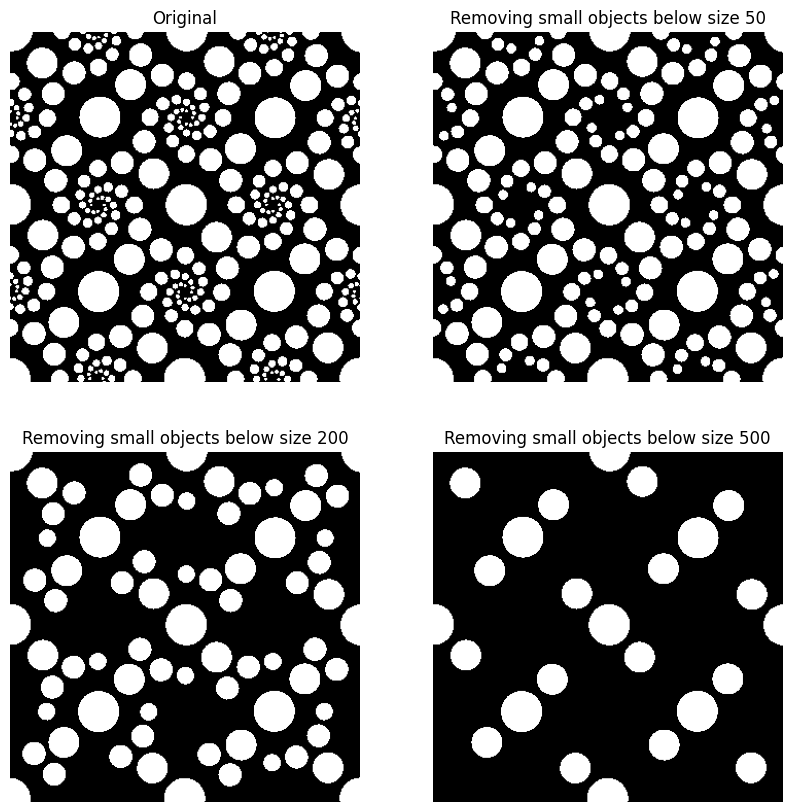

In [ ]:
# Función para mostrar las imágenes lado a lado
def plot_images_horizontally(original, filtered, filter_name, sz=(18, 7)):
    plt.gray()
    plt.figure(figsize=sz)
    plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Original'), plt.axis('off')
    plt.subplot(122), plt.imshow(filtered, cmap='gray'), plt.title(filter_name), plt.axis('off')
    plt.show()

# Cargar la imagen y convertirla a escala de grises
im = cv2.imread(path + 'circles.jpg', cv2.IMREAD_GRAYSCALE)

# Umbralizar la imagen para obtener una imagen binaria
threshold = 0.5 * 255  # Umbralizamos usando 0.5 de 255
_, im_binary = cv2.threshold(im, threshold, 255, cv2.THRESH_BINARY)

# Mostrar la imagen original binarizada
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(im_binary, cmap='gray'), plt.title('Original'), plt.axis('off')

# Función para eliminar objetos pequeños de la imagen binaria
def remove_small_objects_opencv(binary_img, min_size):
    # Encontrar los contornos en la imagen binaria
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear una nueva imagen vacía (negra)
    cleaned_img = np.zeros_like(binary_img)

    # Filtrar y dibujar los contornos que son mayores que el tamaño mínimo
    for contour in contours:
        if cv2.contourArea(contour) >= min_size:
            cv2.drawContours(cleaned_img, [contour], -1, 255, thickness=cv2.FILLED)

    return cleaned_img

# Eliminar objetos pequeños y mostrar los resultados
i = 2
for osz in [50, 200, 500]:
    cleaned_img = remove_small_objects_opencv(im_binary, osz)
    plt.subplot(2, 2, i), plt.imshow(cleaned_img, cmap='gray'), plt.title(f'Removing small objects below size {osz}'), plt.axis('off')
    i += 1

plt.show()

### Morphological contrast enhancement

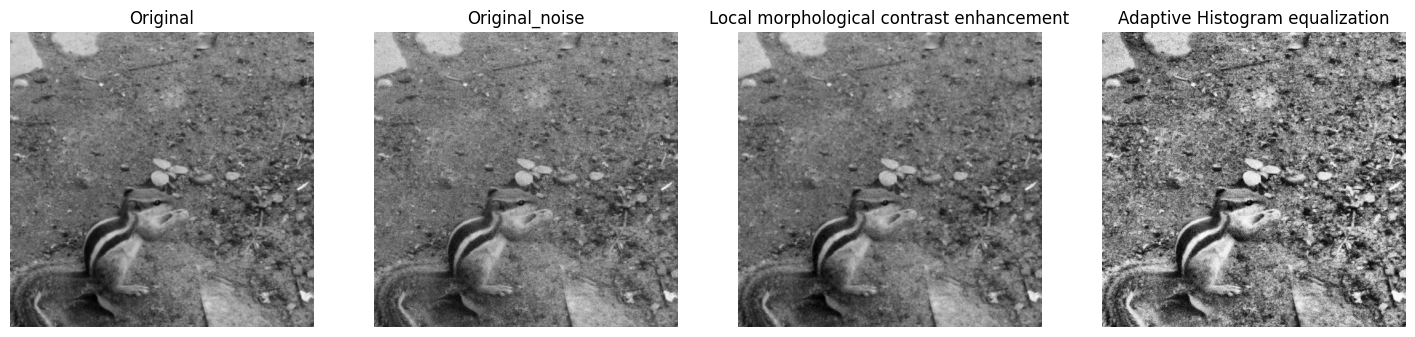

In [ ]:
# Función para mostrar las imágenes en escala de grises
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Cargar la imagen y convertirla a escala de grises
image = cv2.imread(path + 'squirrel.jpg', cv2.IMREAD_GRAYSCALE) / 255.0  # Convertir a [0, 1]

# Agregar ruido gaussiano a la imagen
sigma = 0.05
noisy_image = np.clip(image + sigma * np.random.standard_normal(image.shape), 0, 1)

# Mejora de contraste local con un filtro de apertura (similar a enhance_contrast de skimage)
kernel = np.ones((3, 3), np.uint8)
enhanced_image = cv2.morphologyEx(noisy_image.astype(np.float32), cv2.MORPH_OPEN, kernel)

# Ecualización adaptativa del histograma utilizando CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image = clahe.apply((noisy_image * 255).astype(np.uint8)) / 255.0  # Devuelve a rango [0, 1]

# Mostrar las imágenes
fig, axes = plt.subplots(1, 4, figsize=[18, 7], sharex='row', sharey='row')
axes1, axes2, axes3, axes4 = axes.ravel()

plot_gray_image(axes1, image, 'Original')
plot_gray_image(axes2, noisy_image, 'Original_noise')
plot_gray_image(axes3, enhanced_image, 'Local morphological contrast enhancement')
plot_gray_image(axes4, equalized_image, 'Adaptive Histogram equalization')
plt.show()

### Noise removal with median filter

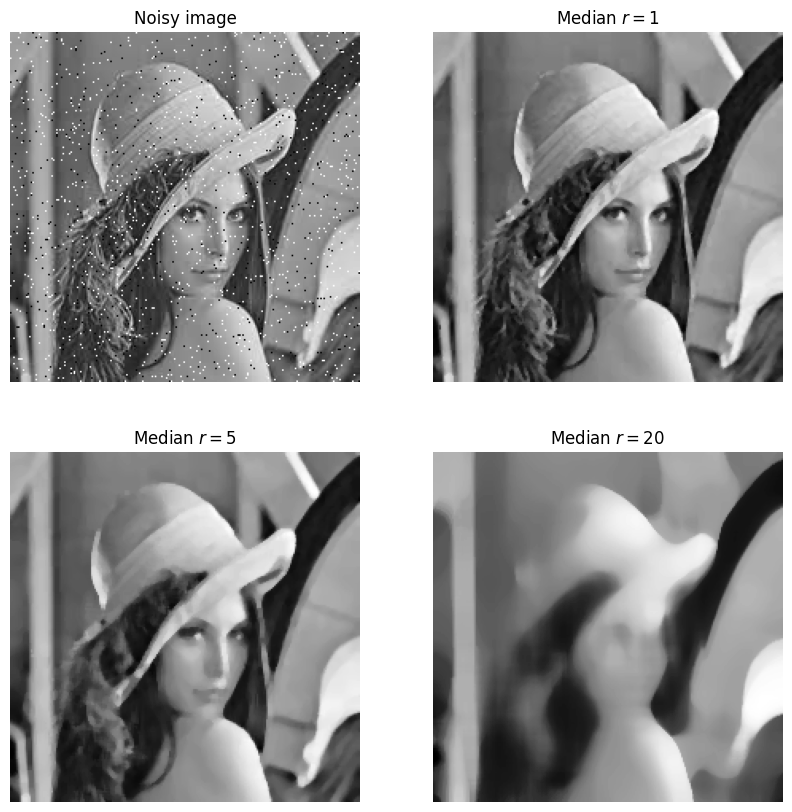

In [ ]:
# Función para mostrar las imágenes en escala de grises
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Cargar la imagen en escala de grises
noisy_image = cv2.imread(path + 'lena.jpg', cv2.IMREAD_GRAYSCALE)

# Agregar ruido sal y pimienta
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.98] = 255
noisy_image[noise < 0.01] = 0

# Aplicar el filtro de mediana con diferentes tamaños de radio (kernel)
median_r1 = cv2.medianBlur(noisy_image, 3)   # Kernel de 3x3
median_r5 = cv2.medianBlur(noisy_image, 5)   # Kernel de 5x5
median_r20 = cv2.medianBlur(noisy_image, 21) # Kernel de 21x21

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, median_r1, 'Median $r=1$')
plot_gray_image(axes3, median_r5, 'Median $r=5$')
plot_gray_image(axes4, median_r20, 'Median $r=20$')
plt.show()

## Ejercicio 5

Crea una clase que reciba una imagen binaria y que cuente con métodos para realizar las operaciones morfológicas que se han visto en clase.


### Definición de Clase

In [ ]:
class OpMorfo:
    def __init__(self, imagen):
        self.imagen = imagen
        self.resultados = {}

    def erosion(self):
        r = rectangle(3, 3)
        im_erosion = binary_erosion(self.imagen, r)
        self.resultados['Erosión'] = im_erosion

    def dilatacion(self):
        im_dil = binary_dilation(self.imagen, disk(3))
        self.resultados['Dilatación'] = im_dil

    def opening(self):
        im_opening = binary_opening(self.imagen, disk(3))
        self.resultados['Opening'] = im_opening

    def closing(self):
        im_closing = binary_closing(self.imagen, disk(3))
        self.resultados['Closing'] = im_closing

    def skeleton(self):
        skeleton = skeletonize(self.imagen)
        self.resultados['Skeleton'] = skeleton

    def imagenesp(self):
        # Mostrar todos los resultados de las operaciones morfológicas
        pylab.gray()
        pylab.figure(figsize=(18, 9))
        pylab.subplot(231), pylab.imshow(self.imagen), pylab.title('Original'), pylab.axis('off')

        # Operaciones morfológicas
        for i, (nombre, resultado) in enumerate(self.resultados.items(), start=2):
            pylab.subplot(2, 3, i), pylab.imshow(resultado),pylab.title(nombre), pylab.axis('off')
        pylab.tight_layout()
        pylab.show()

def showopmorf(image):
  path='/content/images/'
  image = mpimg.imread(path + img3)
  im = rgb2gray(image)
  im[im <= 0.5] = 0
  im[im > 0.5] = 1
  op = OpMorfo(im)
  op.erosion(), op.dilatacion(), op.opening(), op.closing(), op.skeleton()
  op.imagenesp()

### Impresión Imagenes

clock2.jpg


<Figure size 640x480 with 0 Axes>

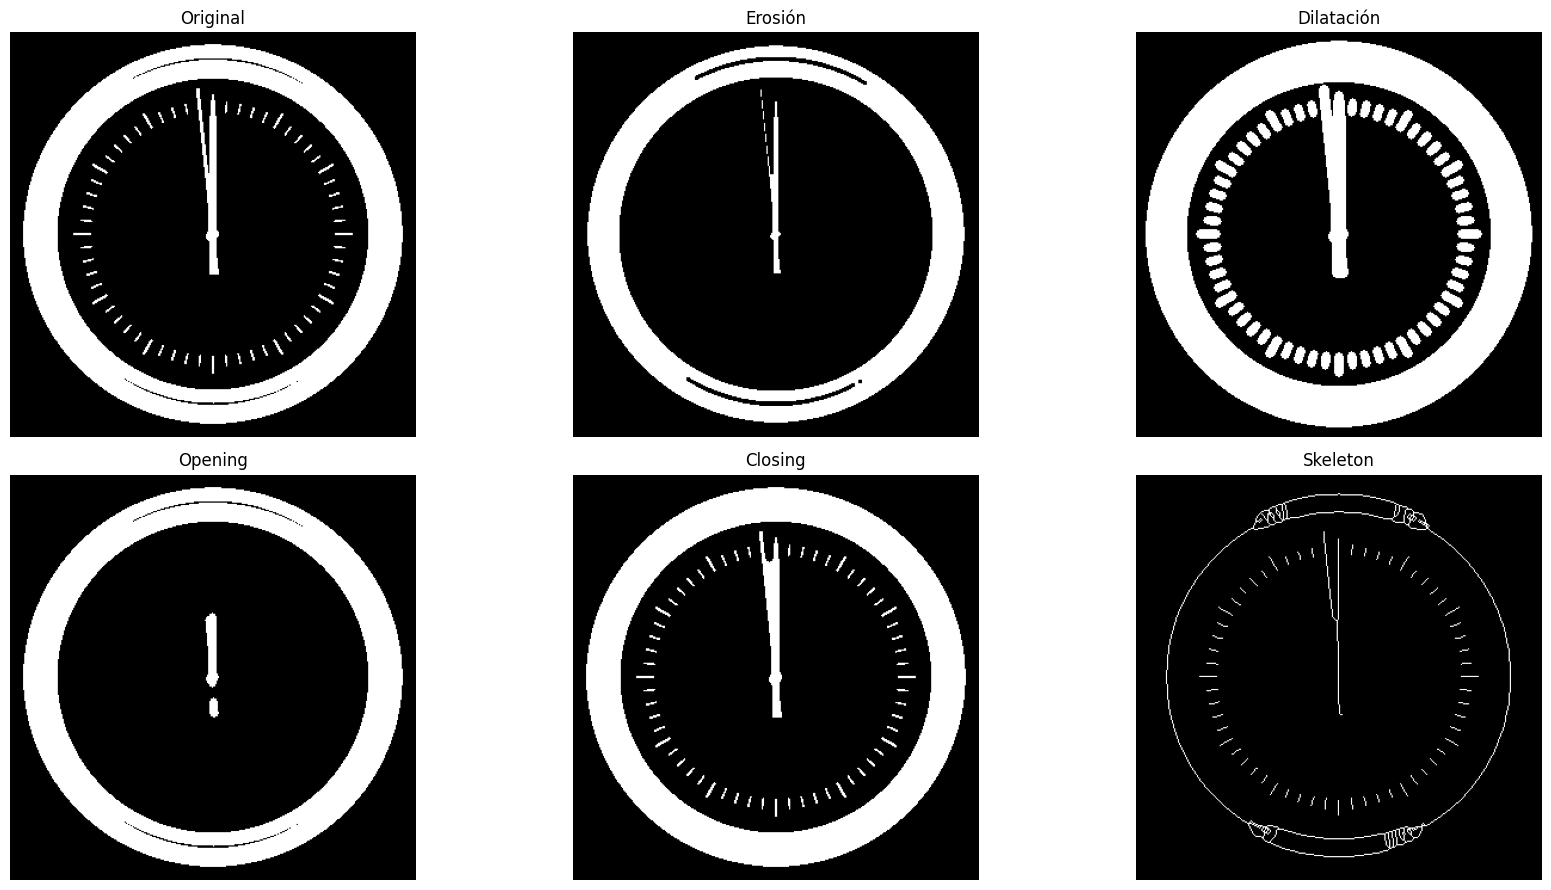

In [ ]:
img3 = input("Ingrese el nombre de la imagen con su extensión (.jpg,.png,etc):\r")
showopmorf(img3)